In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('Netflix_Movies_and_TV_Shows.csv')

In [7]:
df.head()

,Title,Type,Genre,Release Year,Rating,Duration,Country
0,Title 1,TV Show,Comedy,1955,PG,3 Seasons,Japan
1,Title 2,TV Show,Horror,2020,G,3 Seasons,India
2,Title 3,TV Show,Action,1966,TV-PG,140 min,United States
3,Title 4,Movie,Thriller,2011,PG-13,3 Seasons,Canada
4,Title 5,TV Show,Romance,1959,TV-14,172 min,India


In [8]:
df.shape

(3000, 7)

In [9]:
df.describe()

,Release Year
count,3000.000000
mean,1985.935333
std,21.220617
min,1950.000000
25%,1968.000000
50%,1986.000000
75%,2004.000000
max,2023.000000


In [10]:
df.dtypes

,0
Title,object
Type,object
Genre,object
Release Year,int64
Rating,object
Duration,object
Country,object


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         3000 non-null   object
 1   Type          3000 non-null   object
 2   Genre         3000 non-null   object
 3   Release Year  3000 non-null   int64 
 4   Rating        3000 non-null   object
 5   Duration      3000 non-null   object
 6   Country       3000 non-null   object
dtypes: int64(1), object(6)
memory usage: 164.2+ KB


In [12]:
df.columns

Index(['Title', 'Type', 'Genre', 'Release Year', 'Rating', 'Duration',
       'Country'],
      dtype='object')

In [13]:
df.isna().sum()

,0
Title,0
Type,0
Genre,0
Release Year,0
Rating,0
Duration,0
Country,0


In [14]:
df.loc[df.duplicated()]

,Title,Type,Genre,Release Year,Rating,Duration,Country


In [15]:
df.loc[df.duplicated(subset=['Title'])]

,Title,Type,Genre,Release Year,Rating,Duration,Country


In [16]:
df.groupby(['Release Year','Type']).size().unstack(fill_value=0)



Type,Movie,TV Show
Release Year,,
1950,14,34
1951,21,11
1952,14,22
1953,26,17
1954,18,23
...,...,...
2019,21,17
2020,21,19
2021,24,19


Total  no of titles released in each genre

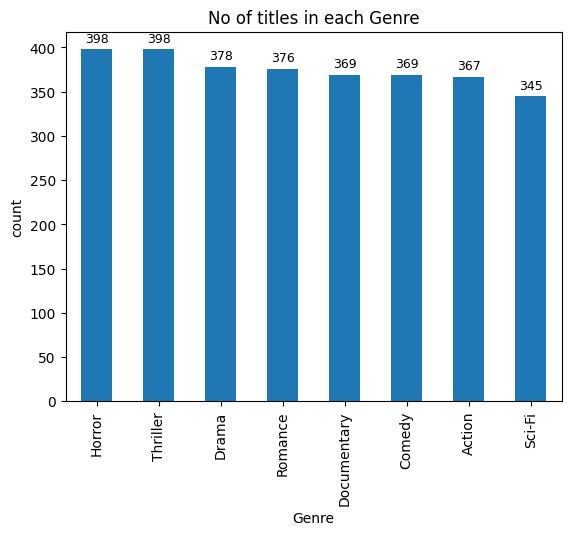

In [17]:
ax=df['Genre'].value_counts()\
.plot(kind='bar',title='No of titles in each Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('count')
for container in ax.containers:
  ax.bar_label(container,label_type='edge', padding=3, fontsize=9)
plt.show()

Maximum titles released in **Horror** and **Thriller**

No of tv shows and movies in each genre

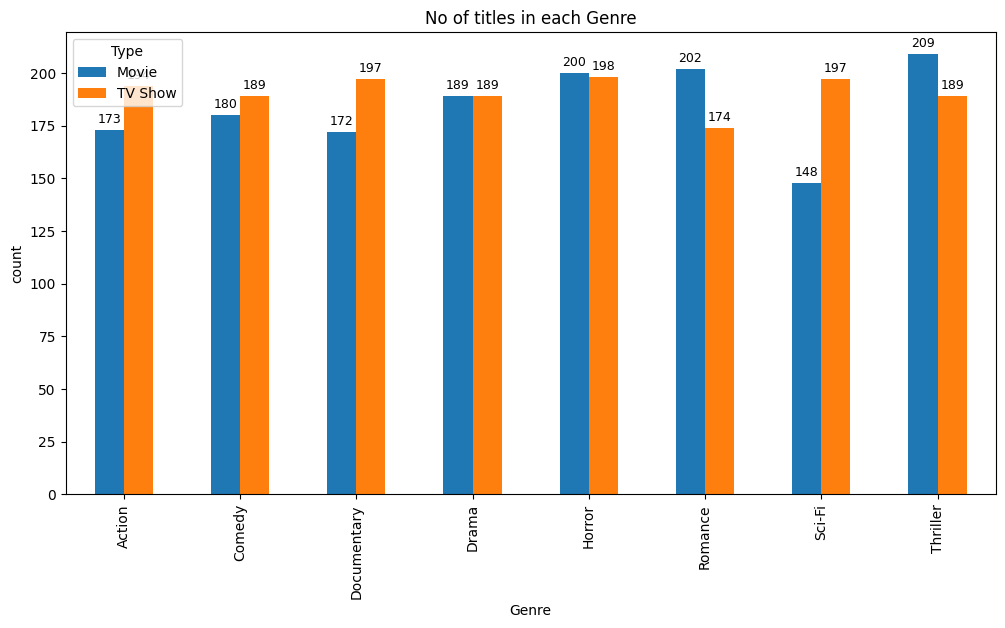

In [18]:
genre_counts=df.groupby(['Genre','Type']).size().unstack(fill_value=0)

ax=genre_counts.plot(kind='bar',figsize=(12,6),title='No of titles in each Genre')
ax.set_xlabel('Genre')
ax.set_ylabel('count')
for container in ax.containers:
  ax.bar_label(container,label_type='edge', padding=3, fontsize=9)
plt.tight_layout
plt.show()

Maximum TV Shows in **Horror Genre** and minimum tv shows in **Romance**
Maximum movies in **Thriller Genre** and minimum movies in **Sci-fi**

In [19]:
df['Rating'].unique()

array(['PG', 'G', 'TV-PG', 'PG-13', 'TV-14', 'TV-MA', 'R'], dtype=object)

Country wise release

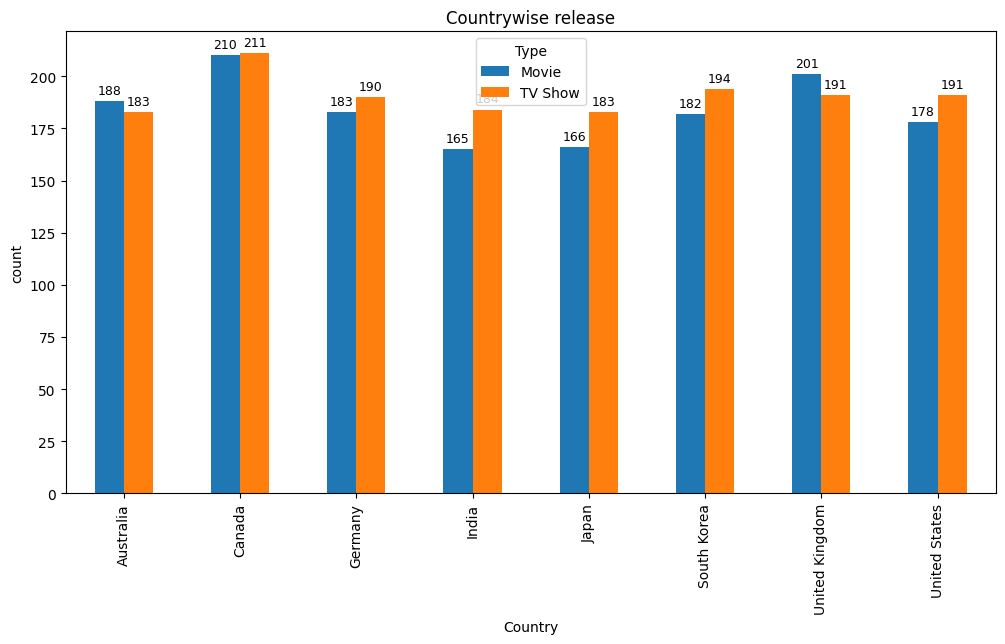

In [20]:
genre_counts=df.groupby(['Country','Type']).size().unstack(fill_value=0)

ax=genre_counts.plot(kind='bar',figsize=(12,6),title='Countrywise release')
ax.set_xlabel('Country')
ax.set_ylabel('count')
for container in ax.containers:
  ax.bar_label(container,label_type='edge', padding=3, fontsize=9)
plt.tight_layout
plt.show()


Maximum titles relased in **Canada** and least movies released in **India and Japan.**

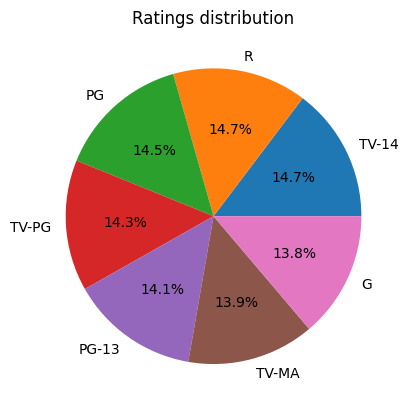

In [21]:
ax=df['Rating'].value_counts().plot(kind='pie',title='Ratings distribution',autopct='%1.1f%%')
ax.set_ylabel('')
plt.show()

Maximum titles are released in the Ratings of **R and TV-14**

Releases after 2000

In [22]:
import plotly.express as px

df1 = df[df['Release Year'] > 2000]
df_grouped = df1.groupby(['Release Year', 'Type']).size().reset_index(name='Total_Count')

fig = px.line(
    df_grouped,
    x='Release Year',
    y='Total_Count',
    color='Type',
    title='Trend of Content Produced on Netflix Every Year (After 2000)'
)
fig.update_traces(mode='lines+markers+text', textposition='top center')
fig.show()

Total no of movies and tv shows

In [23]:
df['Type'].value_counts()

,count
Type,
TV Show,1527
Movie,1473


Titles released in years > 2000

In [27]:
df[df['Release Year'] > 2000]['Release Year'].value_counts().sort_values(ascending=False)


,count
Release Year,
2005,54
2014,48
2002,48
2016,45
2010,44
2018,44
2021,43
2003,42
2004,42


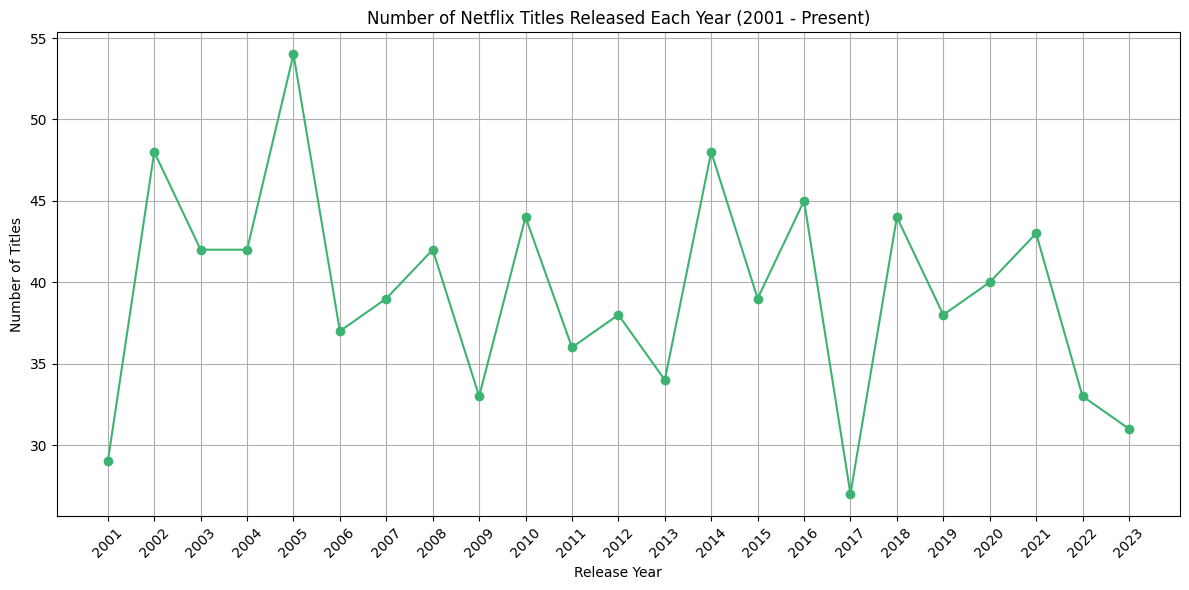

In [32]:
# Filter the data
filtered_df = df[df['Release Year'] > 2000]

# Count titles per year
release_counts = filtered_df['Release Year'].value_counts().sort_index()

# Create full year range from 2001 to the latest year in the data
full_years = pd.Series(index=range(2001, df['Release Year'].max() + 1), dtype='int')
release_counts = release_counts.reindex(full_years.index, fill_value=0)

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(release_counts.index, release_counts.values, marker='o', linestyle='-', color='mediumseagreen')
plt.title('Number of Netflix Titles Released Each Year (2001 - Present)')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xticks(release_counts.index, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()




Maximum titles released in 2005 and minimum in 2017